In [2]:
# Importing basic modules for data importing and manipulation
import pandas as pd
import numpy as np

In [3]:
# importing Dataset
train_df = pd.read_csv("/content/train.csv")

##### Data Preprocessing

In [4]:
# getting a simple view of dataframe
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# getting info of Dataset like columns, Non-null values, Data Type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# printing column names
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# printing Number of null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# getting unique values of Sex and Embarked Columns
print(train_df['Sex'].unique())
print(train_df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]


In [9]:
# Converting Sex and Embarked Catogorical values to Numerical values. Filling nan values with mean of the respective column
train_df['Sex'] = train_df['Sex'].map({'female':1, 'male': 0}).astype(int)
train_df['Embarked'] = train_df['Embarked'].map({'S':0, 'C':1, 'Q':2})
train_df['Age'] = train_df['Age'].fillna(np.mean(train_df['Age']))
train_df['Embarked'] = train_df['Embarked'].fillna(max(train_df['Embarked']))

In [10]:
# Checking Nulls after Filling null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
# checking correlation b/w Survived(target) column to Sex column
train_df["Survived"].corr(train_df['Sex'])

0.5433513806577555

In [12]:
# Correlation Matrix of Dataset to check the correlation b/w all columns
corr = train_df.corr()
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030254
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.114954
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.034393
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.125265
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.018371
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.062871
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.081437
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.068459
Embarked,-0.030254,0.114954,0.034393,0.125265,0.018371,-0.062871,-0.081437,0.068459,1.000000


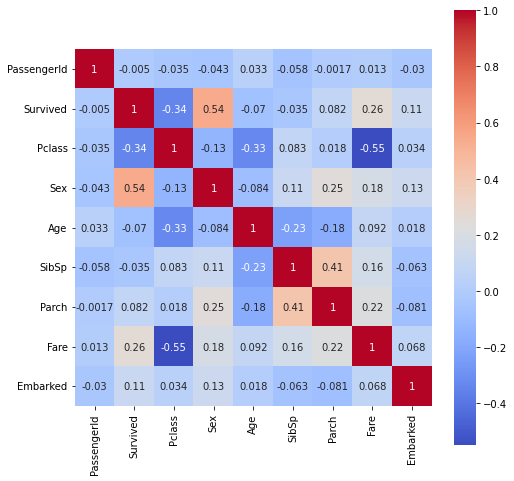

In [13]:
# plotting heatmap to check correlation between columns visually
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True,
           xticklabels= corr.columns.values, yticklabels= corr.columns.values,
           cmap= 'coolwarm')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


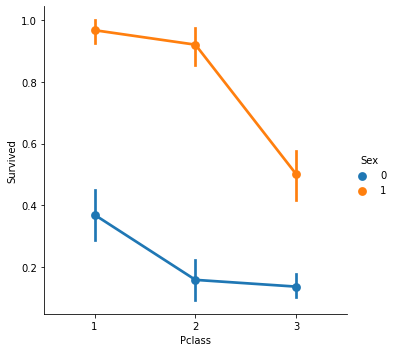

In [14]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train_df)
plt.show()

<Figure size 432x432 with 0 Axes>

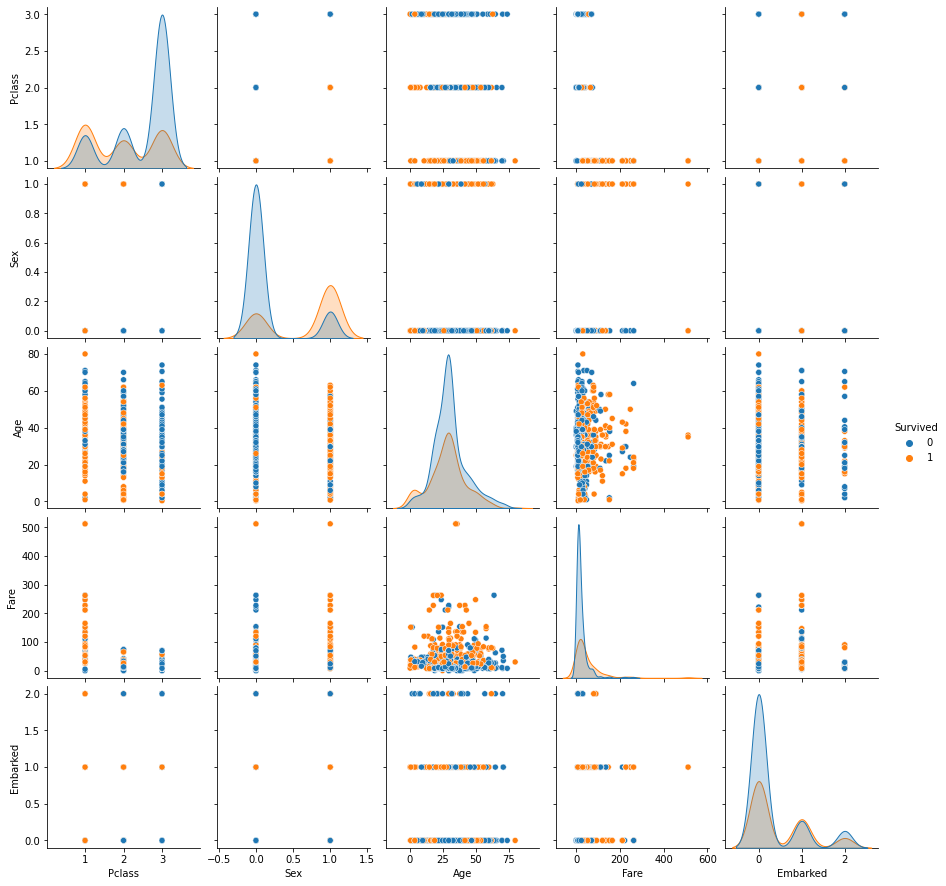

In [21]:
# pairplot to represent relationship b/w all allpairs
plt.figure(figsize=(6,6))
sns.pairplot(train_df, hue="Survived", dropna=True)
plt.show()

In [16]:
# checking correlation between Parch and Survived columns
train_df['Survived'].corr(train_df['Parch'])

0.08162940708348371

In [17]:
# Dropping columns which doesn't contribute much to the model
train_df = train_df.drop(['PassengerId','Name','Ticket', 'SibSp', 'Cabin','Parch'],axis=1)

## Naive Bayes Analysis

In [18]:
# checking null values after removal of unrelated columns 
# now data is null free
print(train_df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64


In [19]:
# splitting data into training and test sets
from sklearn.model_selection import train_test_split
x = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=103)

In [20]:
# importing models and accuracy_score modules from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# fitting the model to data
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# predicting test data with the trained model
y_pred = classifier.predict(x_test)

# getting accuracy of the model using accuracy_score
print(classification_report(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))
print("model accuracy is:",accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.80      0.81       269
           1       0.71      0.75      0.73       177

    accuracy                           0.78       446
   macro avg       0.77      0.77      0.77       446
weighted avg       0.78      0.78      0.78       446

[[215  54]
 [ 45 132]]
model accuracy is: 0.7780269058295964
